In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replace Blanks with 0 as tenuer is 0 and no to tal charges are recorded 

#Also Changed the datatype object to float

In [ ]:
 df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
 df["TotalCharges"] =  df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Check Null Values

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Check Duplicate Data 

In [ ]:
df["customerID"].duplicated().sum()

np.int64(0)

#Do senior citizone value in "Yes" Or "No" to 1 and 0

In [ ]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [ ]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#How many Person Churn with Numeric values from Dataset

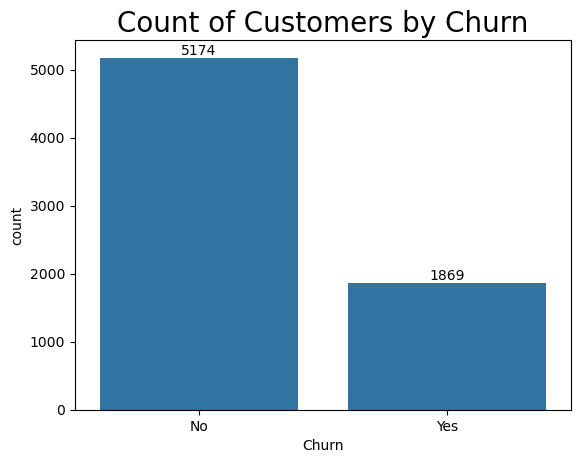

In [ ]:
ax = sns.countplot(x = df ['Churn'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 20)
plt.show()

#How many person Churn Out or No With in percentage wise 

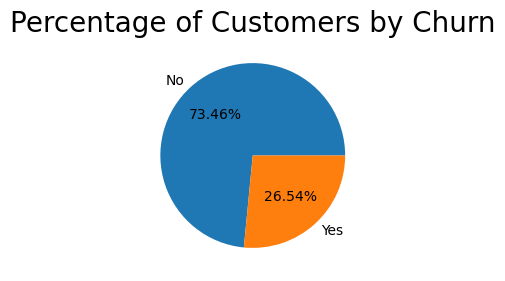

In [ ]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.title("Percentage of Customers by Churn" , fontsize = 20)
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

#In this pie chart 26.54% person are churned out.
#not let's explore the reason behind it 

#Gender wise data and also match with how many Churned Person in Which field 

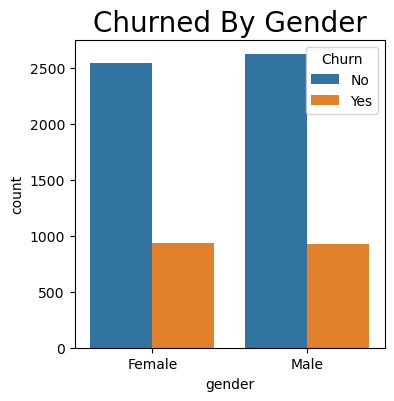

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churned By Gender", fontsize = 20)
plt.show()

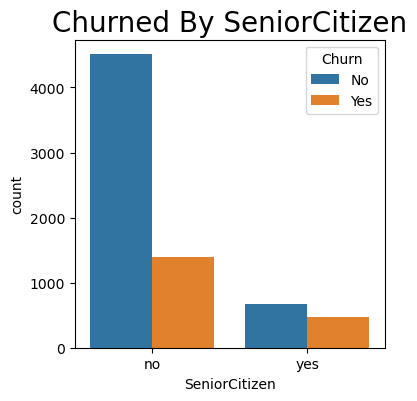

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churned By SeniorCitizen", fontsize = 20)
plt.show()

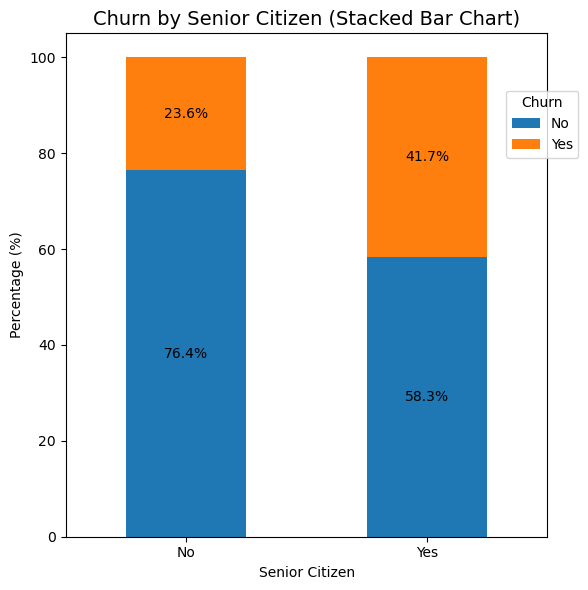

In [ ]:
import matplotlib.pyplot as plt

# Convert to percentage
total_counts = (
    df.groupby('SeniorCitizen')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
total_counts.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#1f77b4', '#ff7f0e']
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center',
        fontsize=10
    )

# Formatting
ax.set_title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize=14)
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Percentage (%)')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.legend(title='Churn', bbox_to_anchor  = (0.9,0.9))

plt.tight_layout()
plt.show()


#comparative a greated parcentage of people in senior citizen category have churned 

#people who have used our services for a longn time have stayed and people who have used our services for #1 or #2 months have churned

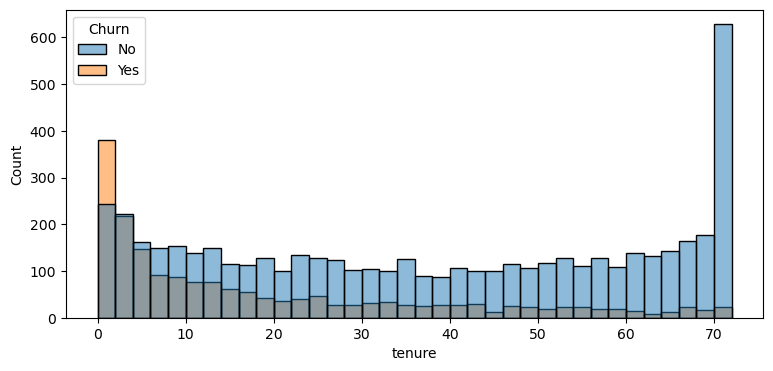

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 36, hue = "Churn")
plt.show()

#That people who have month to month are likely to churn then from who have 1 or 2 years or contract with 2 years 

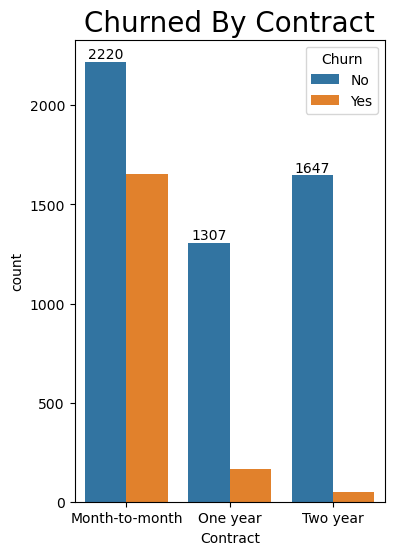

In [ ]:
plt.figure(figsize = (4,6))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned By Contract", fontsize = 20)
plt.show()

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

The count plots show that customers without additional services such as OnlineSecurity, TechSupport, and DeviceProtection tend to churn more frequently. Internet-related features reveal higher churn among users with limited or no bundled services. PhoneService and MultipleLines display relatively stable customer counts, indicating weaker impact on churn. Overall, the visuals highlight that service add-ons play a key role in customer retention.

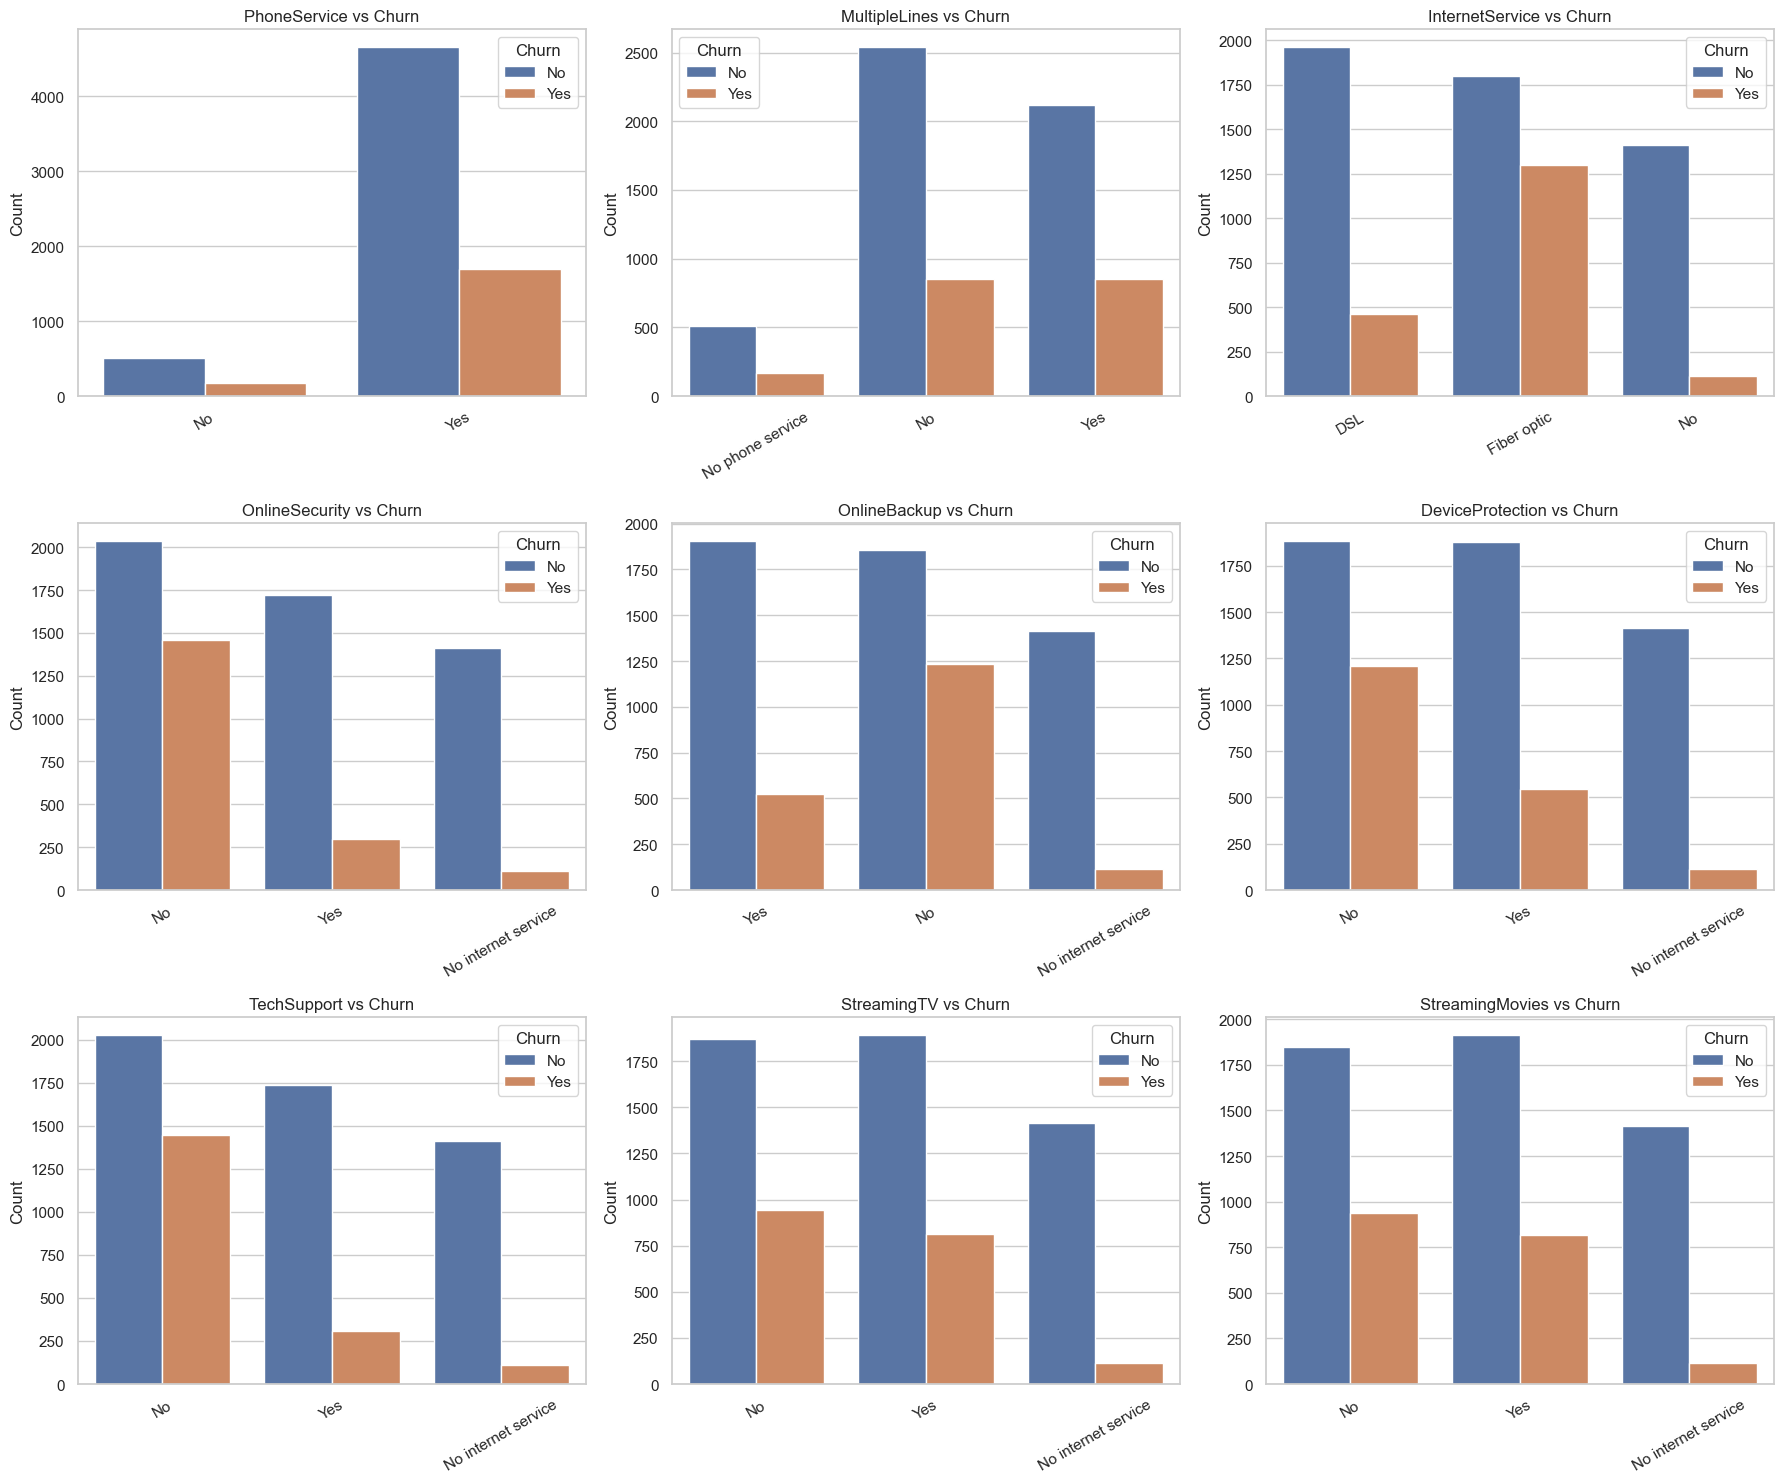

In [ ]:

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
# Set plot style
sns.set(style="whitegrid")

# Create subplot grid (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Loop through columns and axes
for i, col in enumerate(cols):
    sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        ax=axes[i]
    )
    
    axes[i].set_title(f'{col} vs Churn', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.show()


Across all service-related features, customers who lack optional services such as OnlineSecurity, TechSupport, and DeviceProtection show noticeably higher churn counts. Internet-based services (StreamingTV and StreamingMovies) also exhibit substantial churn volume, especially among users without added protection features. Overall, the charts suggest that value-added and support services are strongly associated with lower customer churn, highlighting areas for retention-focused strategies.

In [ ]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]


# Create subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cols):
    # Count data
    count_data = pd.crosstab(df[col], df['Churn'])

    # Plot stacked bar chart (COUNTS)
    count_data.plot(
        kind='bar',
        stacked=True,
        ax=axes[i]
    )

    # Add count labels
    for container in axes[i].containers:
        axes[i].bar_label(
            container,
            label_type='center',
            fontsize=9
        )

    # Formatting
    axes[i].set_title(f'{col} vs Churn (Count)', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Number of Customers')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()



The pie charts show the percentage-wise distribution of categorical features across the customer churn dataset. Most customers fall into a few dominant categories, such as specific contract types and internet services. Service-related features reveal uneven adoption, indicating varying customer preferences. Overall, these distributions help identify patterns that may influence customer churn behavior.


In [ ]:
import math
import matplotlib.pyplot as plt

cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Auto grid calculation
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = df[col].value_counts()
    
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,
        wedgeprops={'edgecolor': 'black'}
    )
    
    axes[i].set_title(f'{col} Distribution', fontsize=13)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


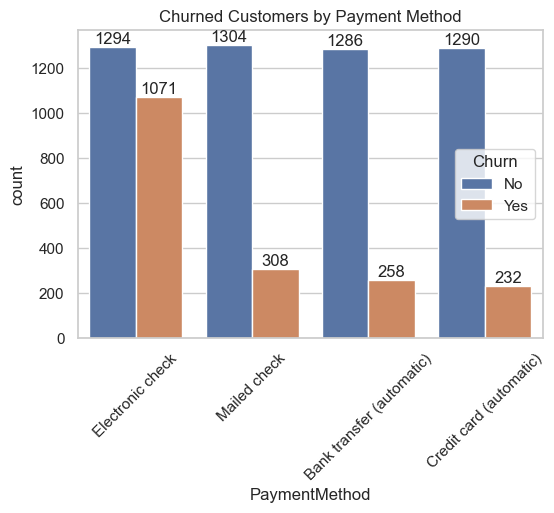

In [ ]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.